In [1]:
import re
import os
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from netCDF4 import Dataset
import geopandas as gpd
from shapely.geometry import Point
import pandas as pd
import rasterio
from rasterio.mask import mask
from rasterio.plot import show


# Visualization of Crop Distribution

In [3]:
def print_raster_info(file_path):
    """
    Print information about a raster file.

    Parameters:
    file_path (str): Path to the raster file.
    """
    with rasterio.open(file_path) as dataset:
        print("File Path:", file_path)
        print("Width:", dataset.width)
        print("Height:", dataset.height)
        print("Number of Bands:", dataset.count)
        print("Coordinate Reference System (CRS):", dataset.crs)
        print("Transform (Affine Transformation Parameters):", dataset.transform)
        print("Bounds:", dataset.bounds)
        
        # Print information for each band
        for i in range(1, dataset.count + 1):
            band = dataset.read(i)
            print(f"Band {i} - Min: {band.min()}, Max: {band.max()}, Mean: {band.mean()}")

# Path to the TIFF file
file_path = '/global/scratch/users/liuwenjin021011/data/GFSAD1000/GFSAD1KCD.2010.001.2016348142525.tif'
print_raster_info(file_path)


File Path: /global/scratch/users/liuwenjin021011/data/GFSAD1000/GFSAD1KCD.2010.001.2016348142525.tif
Width: 40430
Height: 20160
Number of Bands: 1
Coordinate Reference System (CRS): EPSG:4326
Transform (Affine Transformation Parameters): | 0.01, 0.00,-180.02|
| 0.00,-0.01, 90.01|
| 0.00, 0.00, 1.00|
Bounds: BoundingBox(left=-180.01636766952797, bottom=-89.98702927013751, right=180.9506393039613, top=90.00542337852794)
Band 1 - Min: 0, Max: 9, Mean: 2.735365916349638


Min Value: 0
Max Value: 9
Mean Value: 2.735365916349638
Standard Deviation: 4.005966907118808
Value distribution:
Value 0: 545807986 pixels
Value 1: 2411361 pixels
Value 2: 1467842 pixels
Value 3: 2905144 pixels
Value 4: 10336909 pixels
Value 5: 10218872 pixels
Value 6: 4773251 pixels
Value 7: 10903688 pixels
Value 8: 18152103 pixels
Value 9: 208091644 pixels


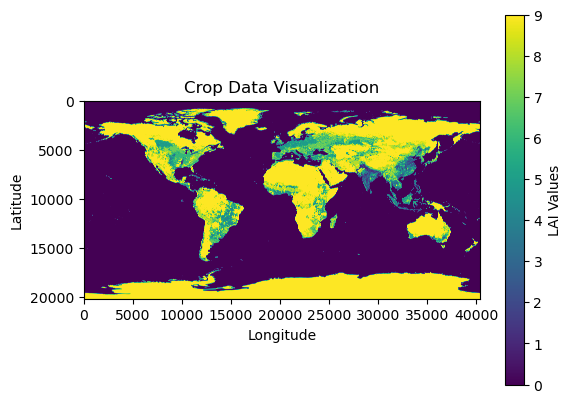

In [4]:
def basic_data_analysis(file_path):
    with rasterio.open(file_path) as dataset:
        # Read the first (and only) band
        band1 = dataset.read(1)
        
        # Basic statistics
        min_value = band1.min()
        max_value = band1.max()
        mean_value = band1.mean()
        std_dev = band1.std()

        print(f"Min Value: {min_value}")
        print(f"Max Value: {max_value}")
        print(f"Mean Value: {mean_value}")
        print(f"Standard Deviation: {std_dev}")

        # Distribution of values
        values, counts = np.unique(band1, return_counts=True)
        print("Value distribution:")
        for value, count in zip(values, counts):
            print(f"Value {value}: {count} pixels")

        # Plotting the data
        plt.imshow(band1, cmap='viridis')
        plt.colorbar(label='LAI Values')
        plt.title('Crop Data Visualization')
        plt.xlabel('Longitude')
        plt.ylabel('Latitude')
        plt.show()

# Path to the TIFF file
file_path = '/global/scratch/users/liuwenjin021011/data/GFSAD1000/GFSAD1KCD.2010.001.2016348142525.tif'
basic_data_analysis(file_path)


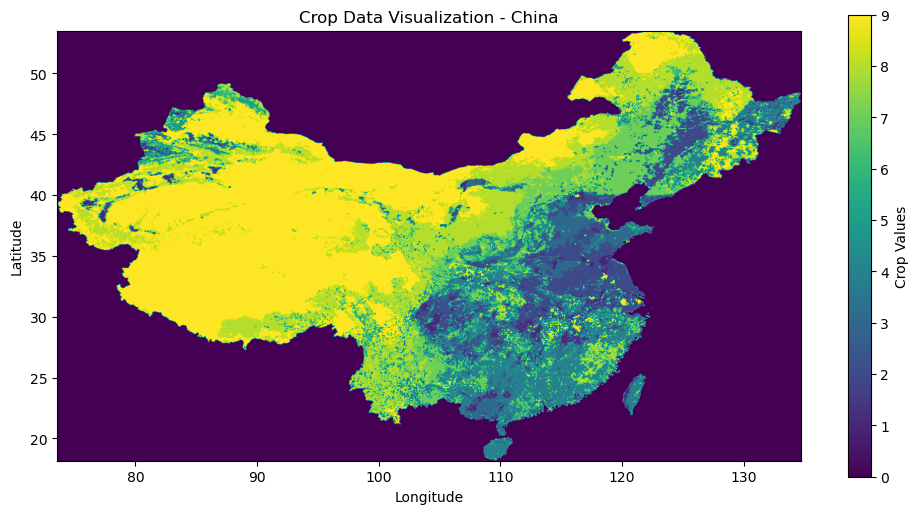

In [5]:
def visualize_data_in_china(raster_file_path, shapefile_path):
    # Load the shapefile of China
    china_shape = gpd.read_file(shapefile_path)

    # Open the raster file
    with rasterio.open(raster_file_path) as src:
        # Mask the raster with the shapefile
        out_image, out_transform = mask(src, china_shape.geometry, crop=True)
        out_meta = src.meta.copy()

    # Create a single figure and axis
    fig, ax = plt.subplots(figsize=(12, 6))

    # Visualize the data using the axis 'ax'
    img_show = show(out_image[0], transform=out_transform, cmap='viridis', ax=ax)

    # Add colorbar to the axis
    plt.colorbar(img_show.get_images()[0], ax=ax, label='Crop Values')
    ax.set_title('Crop Data Visualization - China')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

    plt.show()

# File paths
raster_file_path = '/global/scratch/users/liuwenjin021011/data/GFSAD1000/GFSAD1KCD.2010.001.2016348142525.tif'
shapefile_path = '/global/home/users/liuwenjin021011/logs/fall_2023/China-Doundary-Shape.shp'
visualize_data_in_china(raster_file_path, shapefile_path)


In [9]:
raster_file_path = '/global/scratch/users/liuwenjin021011/data/GFSAD1000/GFSAD1KCD.2010.001.2016348142525.tif'
shapefile_path = '/global/home/users/liuwenjin021011/logs/fall_2023/China-Doundary-Shape.shp'

china_shape = gpd.read_file(shapefile_path)

# Open the raster file
with rasterio.open(raster_file_path) as src:
    # Mask the raster with the shapefile
    print(1)
    out_image, out_transform = mask(src, china_shape.geometry, crop=True)
    layer_mask = out_image[0] == 4

1


In [22]:
out_image, out_transform

(array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8),
 Affine(0.008928197055985389, 0.0, 73.55335691751307,
        0.0, -0.008928197055985389, 53.53373840482762))

In [42]:
layer_mask = out_image[0][8]
np.max(layer_mask)

9

In [4]:
file = rasterio.open(raster_file_path)

In [7]:
import rioxarray
file = rioxarray.open_rasterio(raster_file_path)
file

<xarray.DataArray (band: 1, y: 20160, x: 40430)>
[815068800 values with dtype=uint8]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 -180.0 -180.0 -180.0 -180.0 ... 180.9 180.9 180.9
  * y            (y) float64 90.0 89.99 89.98 89.97 ... -89.96 -89.97 -89.98
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:           Area
    TIFFTAG_RESOLUTIONUNIT:  1 (unitless)
    TIFFTAG_SOFTWARE:        IMAGINE TIFF Support\nCopyright 1991 - 1999 by E...
    TIFFTAG_XRESOLUTION:     1
    TIFFTAG_YRESOLUTION:     1
    scale_factor:            1.0
    add_offset:              0.0

In [8]:
file.band

<xarray.DataArray 'band' (band: 1)>
array([1])
Coordinates:
  * band         (band) int64 1
    spatial_ref  int64 0

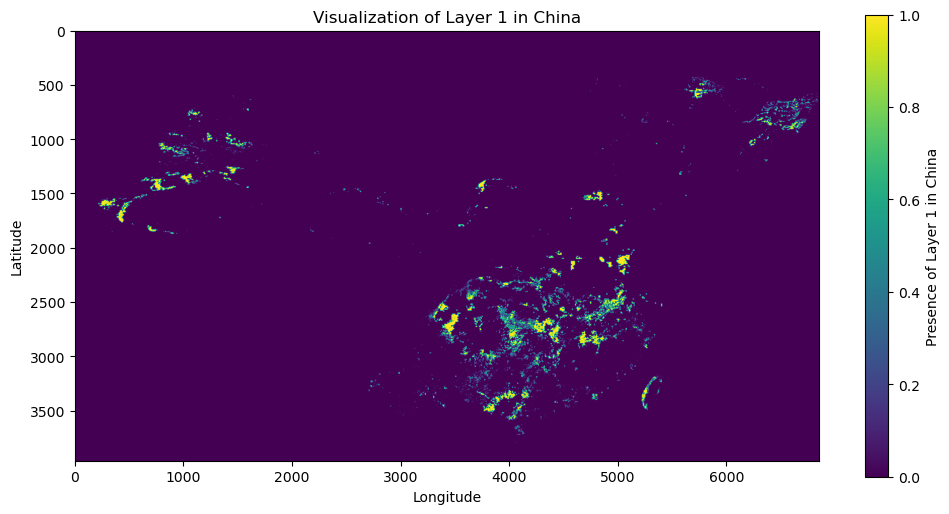

In [6]:

def visualize_specific_layer_within_china(raster_file_path, shapefile_path, layer_value):
    # Load the shapefile of China
    china_shape = gpd.read_file(shapefile_path)

    # Open the raster file
    with rasterio.open(raster_file_path) as src:
        # Mask the raster with the shapefile
        out_image, out_transform = mask(src, china_shape.geometry, crop=True)

    # Create a mask for the specific layer within the cropped area
    layer_mask = out_image[0] == layer_value

    # Plotting the specific layer within China
    plt.figure(figsize=(12, 6))
    plt.imshow(layer_mask, cmap='viridis')
    plt.colorbar(label=f'Presence of Layer {layer_value} in China')
    plt.title(f'Visualization of Layer {layer_value} in China')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()

# File path
raster_file_path = '/global/scratch/users/liuwenjin021011/data/GFSAD1000/GFSAD1KCD.2010.001.2016348142525.tif'
shapefile_path = '/global/home/users/liuwenjin021011/logs/fall_2023/China-Doundary-Shape.shp'

# Layer 1: Irrigated - Wheat and Rice
visualize_specific_layer_within_china(raster_file_path, shapefile_path, 1)


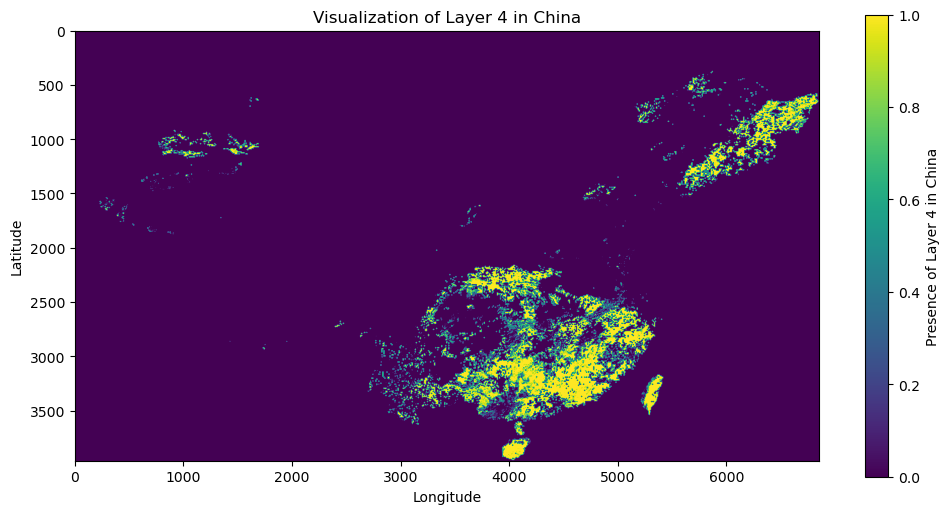

In [7]:
# Layer 4, NAME: Rainfed, DESCRIPTION: Wheat, Rice, Soybeans, Surgarcane, Corn, Cassava
visualize_specific_layer_within_china(raster_file_path, shapefile_path, 4)

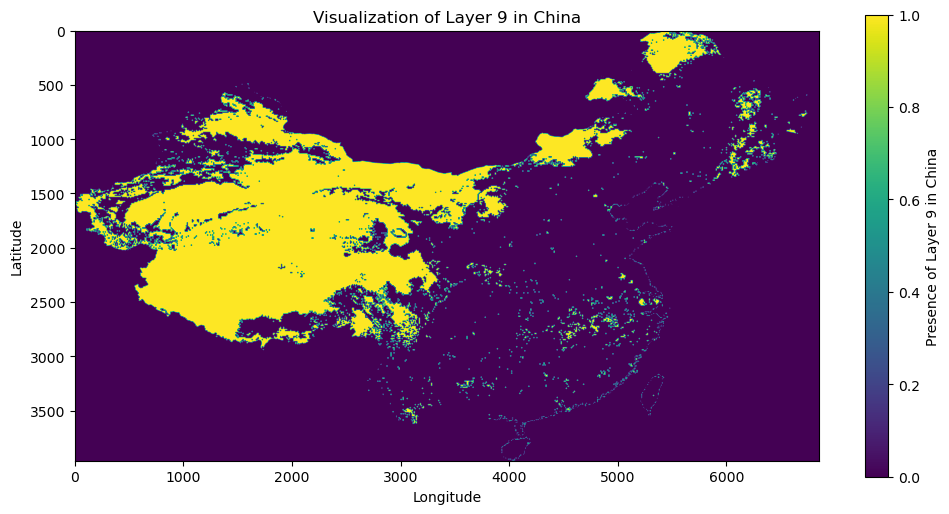

In [8]:
visualize_specific_layer_within_china(raster_file_path, shapefile_path, 9)

# PART 2, Detailed Analysis of Crop Distribution

In [18]:


def open_and_inspect_tiff(file_path):
    # Open the raster file
    raster = rioxarray.open_rasterio(file_path)

    print("Raster Details:")
    print("Dimensions:", raster.dims)
    print("Coordinates:", raster.coords)
    print("Number of Bands:", raster.rio.count)
    print("CRS:", raster.rio.crs)
    print("Bounds:", raster.rio.bounds())
    print("Resolution:", raster.rio.resolution())
    print("Width:", raster.rio.width)
    print("Height:", raster.rio.height)

    # Additional analysis or visualization can be done here

    return raster

# File path
file_path = '/global/scratch/users/liuwenjin021011/data/GFSAD1000/GFSAD1KCD.2010.001.2016348142525.tif'

# Open and inspect the TIFF file
data = open_and_inspect_tiff(file_path)


Raster Details:
Dimensions: ('band', 'y', 'x')
Coordinates: Coordinates:
  * band         (band) int64 1
  * x            (x) float64 -180.0 -180.0 -180.0 -180.0 ... 180.9 180.9 180.9
  * y            (y) float64 90.0 89.99 89.98 89.97 ... -89.96 -89.97 -89.98
    spatial_ref  int64 0
Number of Bands: 1
CRS: EPSG:4326
Bounds: (-180.01636766952797, -89.98702927013748, 180.9506393039613, 90.00542337852794)
Resolution: (0.008928197055985389, -0.008928197055985389)
Width: 40430
Height: 20160


In [62]:
def analyze_crop_distribution(raster_file_path, shapefile_path):
    # Load raster data
    data = rioxarray.open_rasterio(raster_file_path)

    # Load province boundaries
    provinces = gpd.read_file(shapefile_path)

    # Initialize a DataFrame to store results
    results = pd.DataFrame()

    # Analyze each province
    for province in provinces.itertuples():
        # Mask raster data with the province boundary
        masked_data = data.rio.clip([province.geometry])

        # Compute average values for each layer within the province
        avg_values = masked_data.mean(dim=["x", "y"]).values

        # Append results
        results = results.append({'Province': province.ADM1_EN, 'Average Values': avg_values}, ignore_index=True)

    return results

# File paths
raster_file_path = '/global/scratch/users/liuwenjin021011/data/GFSAD1000/GFSAD1KCD.2010.001.2016348142525.tif'
shapefile_path = '/global/home/users/liuwenjin021011/logs/fall_2023/China-Province-Doundary-Shape.shp'

# Perform the analysis
# crop_distribution_analysis = analyze_crop_distribution(raster_file_path, shapefile_path)
# crop_distribution_analysis.to_csv('China-Province-Level-Crop-Distribution.csv', index = False, header = True)

crop_distribution_analysis = pd.read_csv('China-Province-Level-Crop-Distribution.csv')

In [67]:
crop_distribution_analysis

,Province,Average Values
0,Shaanxi Province,[2.66258977]
1,Shanghai Municipality,[2.01582362]
2,Chongqing Municipality,[1.56224488]
3,Zhejiang Province,[2.37567852]
4,Jiangxi Province,[2.34554077]
5,Yunnan Province,[3.35353502]
6,Shandong Province,[1.50309118]
7,Liaoning Province,[2.57044799]
8,Tibet Autonomous Region,[4.8993111]
9,Gansu province,[2.046468]
